In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

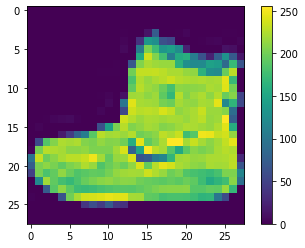

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images/255.0
test_images = test_images/255.0

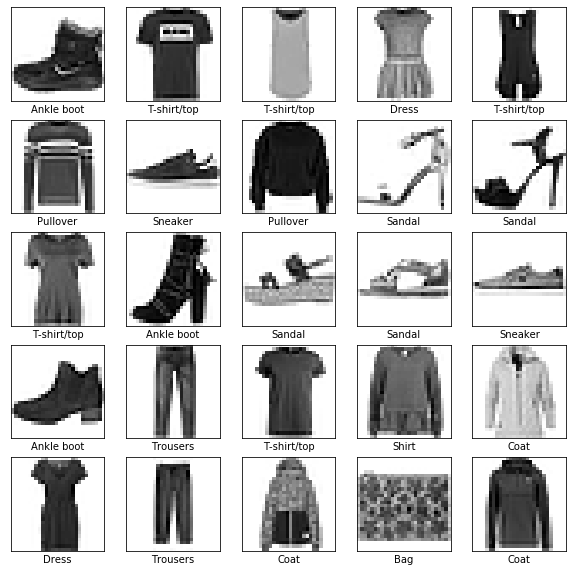

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4984 - accuracy: 0.8248
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3786 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3362 - accuracy: 0.8774
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3147 - accuracy: 0.8840
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2937 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2810 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2678 - accuracy: 0.9013
Epoch 8/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2607 - accuracy: 0.9021
Epoch 9/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2490 - accuracy: 0.9067
Epoch 10/10
60

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.8804


In [23]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([3.44462569e-05, 1.34480835e-08, 1.22290294e-06, 2.53574353e-08,
       1.06658241e-07, 4.50979685e-03, 3.08573340e-06, 2.15134230e-02,
       8.75007572e-07, 9.73936975e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [168]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt. grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

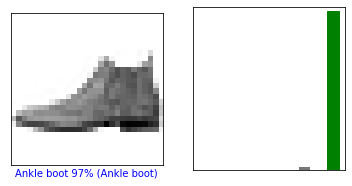

In [169]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

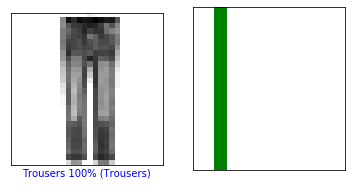

In [170]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

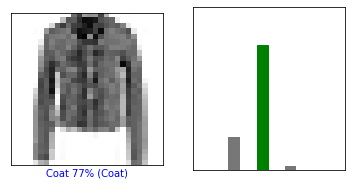

In [171]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

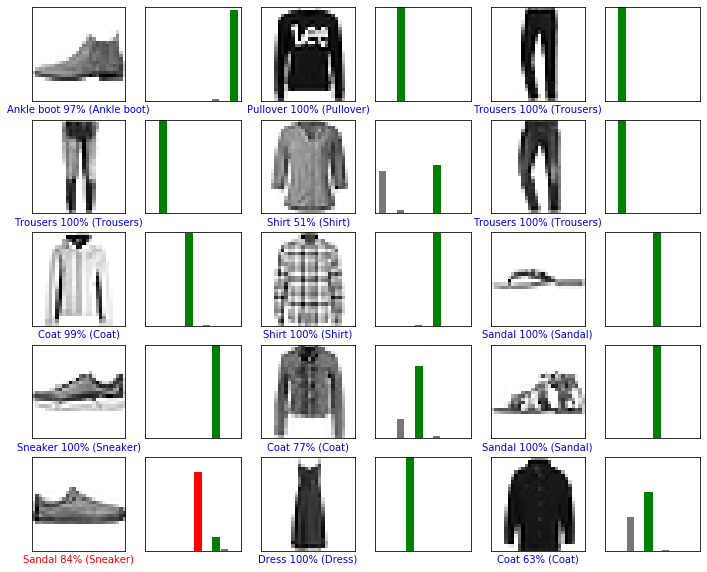

In [172]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [174]:
img = test_images[10]

print(img.shape)

(28, 28)


In [176]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [177]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0239978e-04 1.9783633e-05 2.0137377e-01 3.4254617e-07 7.6970434e-01
  2.9731723e-06 2.8796181e-02 9.4942632e-10 1.6050713e-07 2.4669637e-09]]


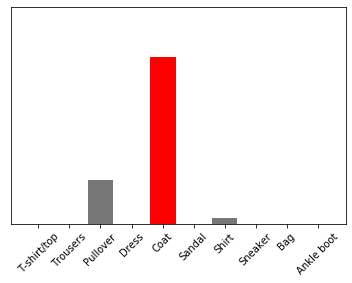

In [178]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [179]:
np.argmax(predictions_single[0])

4

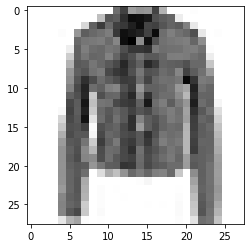

In [181]:
plt.figure()
plt.imshow(test_images[10], cmap=plt.cm.binary)
plt.grid(False)
plt.show()